# Analisis Deskriptif Hate Speech dan Abusive Language dari Tweet Masyarakat Indonesia
Tujuan dalam penelitian ini untuk menganalisis data tweet yang mengandung ujaran kebencian dan kata kasar yang berfokus pada:
1.	Mengidentifikasi distribusi dan frekuensi ujaran kebencian dan bahasa kasar dalam tweet.
2.	Menganalisis target ujaran kebencian, apakah ditujukan kepada individu atau kelompok.
3.	Mengkategorikan jenis-jenis ujaran kebencian berdasarkan agama, ras, kondisi fisik, jenis kelamin, dan kategori lainnya.
4.	Mendeskripsikan kata yang sering digunakan dalam data



## Import Library
mengimport library yang diperlukan

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Data Prepration

### Load Data

In [4]:
df = pd.read_csv("data/data.csv", encoding='latin1')

## Cek data 5 teratas dan terbawah
sebelum memulai analisis kita cek data terlebih dahulu

In [5]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


## Cek jumlah kolom dan total data
Data yang diolah memiliki 13 kolom dan total data 13169

In [6]:
df.shape

(13169, 13)

## Cek Duplikat Data

In [8]:
df.duplicated().sum()

125

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

## Cek Missing Value

In [12]:
df.isna().sum()/df.shape[0]

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

# Analyze

### Visualization

#### Mengidentifikasi distribusi dan frekuensi ujaran kebencian dan bahasa kasar dalam tweet menggunakan Pie Chart

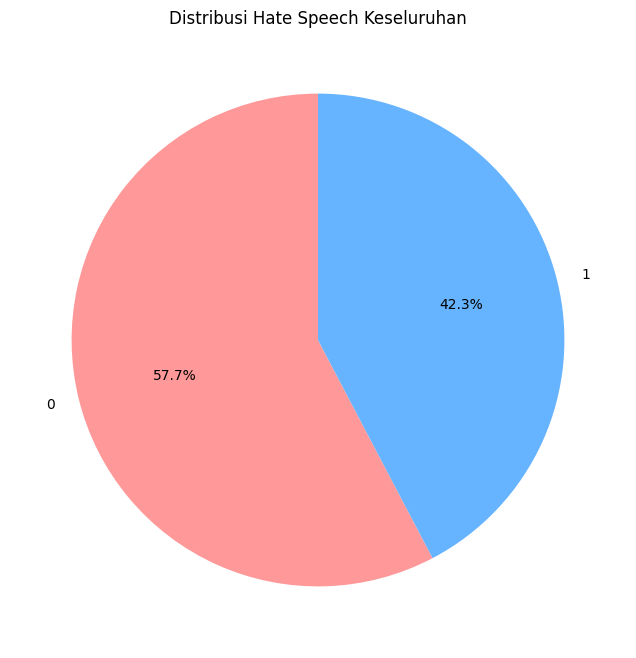

In [13]:
# Hitung distribusi target ujaran kebencian terhadap HS
individual_counts = df['HS'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(individual_counts, labels=individual_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribusi Hate Speech Keseluruhan')
plt.show()


Berdasarkan visualisasi data diatas dapat kita simpulkan bahwa penggunaan Hate Speech dalam tweet masyarakat indonesia memiliki 42.3% Hate speech dari 13169 total data.

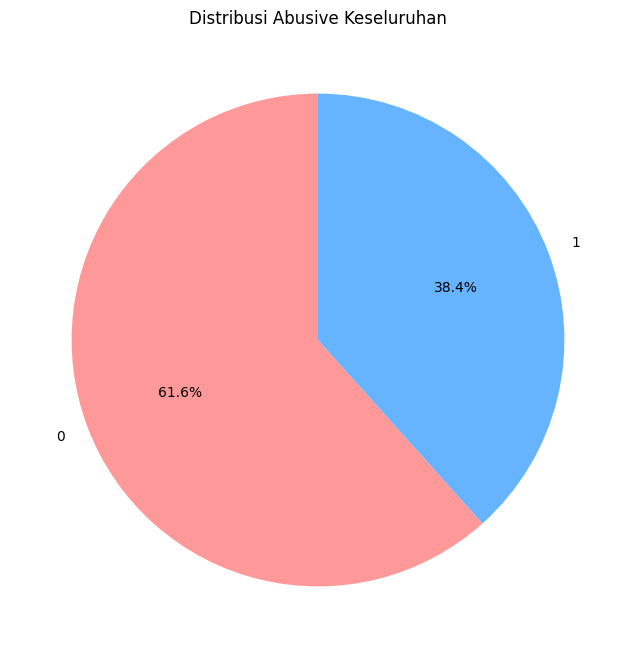

In [14]:
# Hitung distribusi target ujaran kebencian terhadap Abusive
individual_counts = df['Abusive'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(individual_counts, labels=individual_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribusi Abusive Keseluruhan')
plt.show()

Berdasarkan visualisasi data diatas dapat kita simpulkan bahwa penggunaan Abusive dalam tweet masyarakat indonesia memiliki 38.4% Abusive dari 13169 total data.

#### Menganalisis target ujaran kebencian, apakah ditujukan kepada individu atau kelompok menggunakan Bar Chart

##### Ujaran terhadap Individu

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17204\887177781.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=individual_counts, palette=['#66b3ff', '#ff9999'])


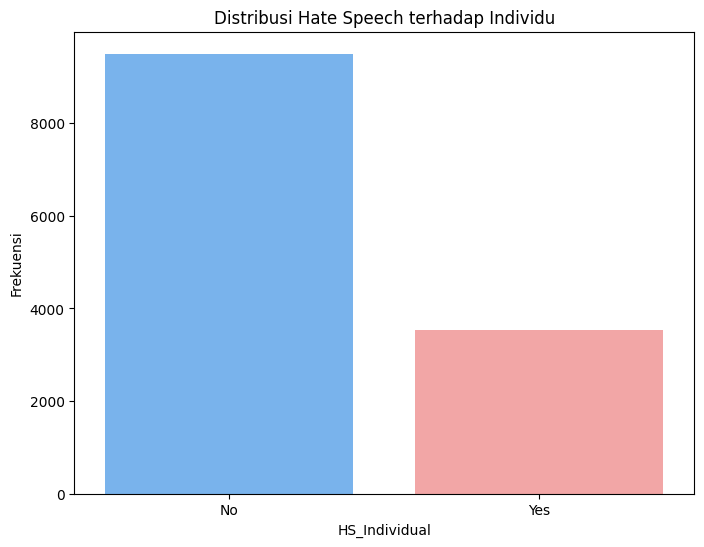

In [15]:
# Hitung distribusi target ujaran kebencian terhadap individu
individual_counts = df['HS_Individual'].value_counts().sort_index()

# Ganti label 0 dan 1 dengan "No" dan "Yes"
labels = ['No', 'Yes']

# Buat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=individual_counts, palette=['#66b3ff', '#ff9999'])
plt.title('Distribusi Hate Speech terhadap Individu')
plt.xlabel('HS_Individual')
plt.ylabel('Frekuensi')
plt.show()

#### Ujaran terhadap kelompok

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17204\3373815544.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=group_counts, palette=['#66b3ff', '#ff9999'])


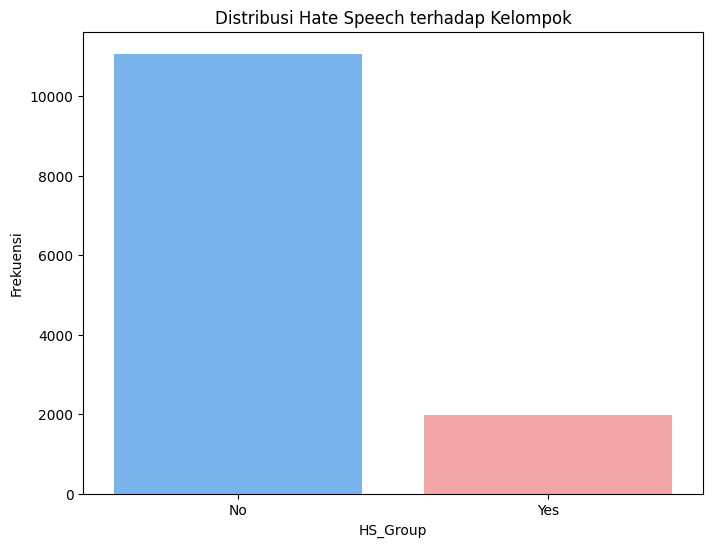

In [16]:
# Hitung distribusi target ujaran kebencian terhadap kelompok
group_counts = df['HS_Group'].value_counts().sort_index()

# Ganti label 0 dan 1 dengan "No" dan "Yes"
labels = ['No', 'Yes']

# Buat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=group_counts, palette=['#66b3ff', '#ff9999'])
plt.title('Distribusi Hate Speech terhadap Kelompok')
plt.xlabel('HS_Group')
plt.ylabel('Frekuensi')
plt.show()

#### Individu vs Kelompok

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17204\3944128229.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Target', data=yes_counts_df, palette='viridis')


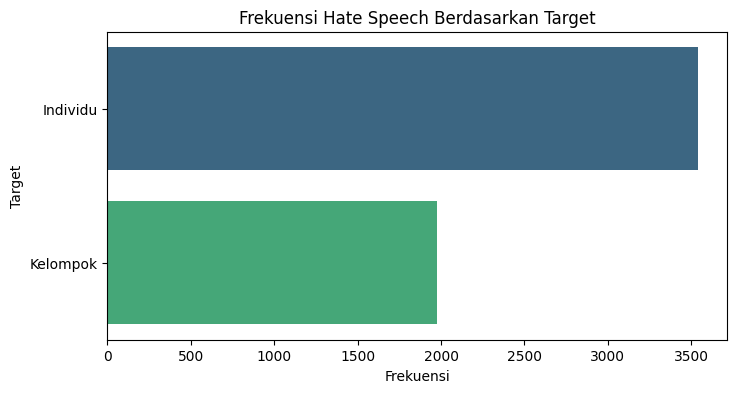

In [17]:
# Daftar target
targets = ['HS_Individual', 'HS_Group']
target_titles = ['Individu', 'Kelompok']

# Hitung frekuensi nilai "Yes" (1) untuk setiap target
yes_counts = {hs: df[hs].sum() for hs in targets}
yes_counts_df = pd.DataFrame(list(yes_counts.items()), columns=['Category', 'Count'])
yes_counts_df['Target'] = target_titles

# Buat bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='Count', y='Target', data=yes_counts_df, palette='viridis')
plt.title('Frekuensi Hate Speech Berdasarkan Target')
plt.xlabel('Frekuensi')
plt.ylabel('Target')
plt.show()

#### Mengkategorikan jenis-jenis ujaran kebencian berdasarkan agama, ras, kondisi fisik, jenis kelamin, dan kategori lainnya.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17204\3351112329.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Category', data=yes_counts_df, palette='viridis')


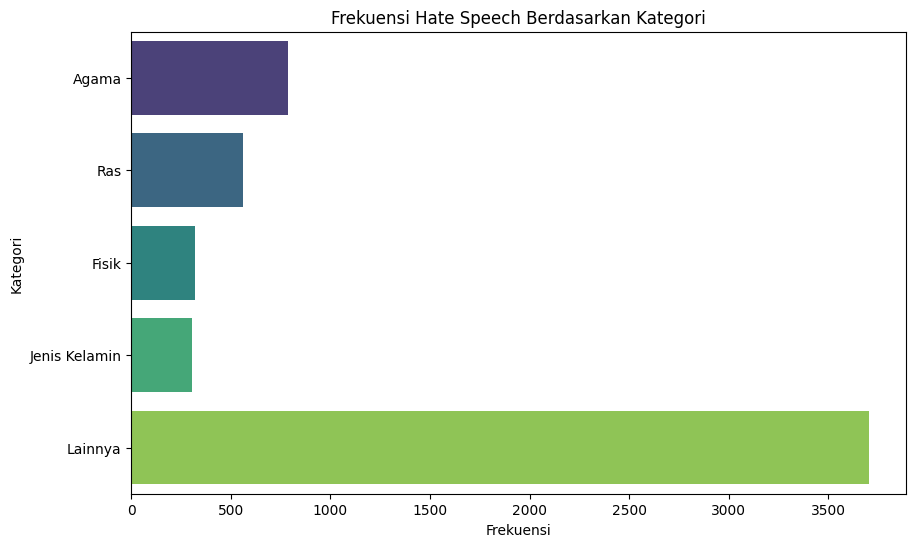

In [18]:
# Daftar kategori
categories = ['HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']
category_titles = ['Agama', 'Ras', 'Fisik', 'Jenis Kelamin', 'Lainnya']

# Hitung frekuensi nilai "Yes" (1) untuk setiap kategori
yes_counts = {category: df[category].sum() for category in categories}
yes_counts_df = pd.DataFrame(list(yes_counts.items()), columns=['Category', 'Count'])
yes_counts_df['Category'] = category_titles

# Buat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Category', data=yes_counts_df, palette='viridis')
plt.title('Frekuensi Hate Speech Berdasarkan Kategori')
plt.xlabel('Frekuensi')
plt.ylabel('Kategori')
plt.show()

#### Mendeskripsikan kata yang sering digunakan dalam data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17204\2372066136.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_cleaned'] = df['Tweet'].apply(clean_text)


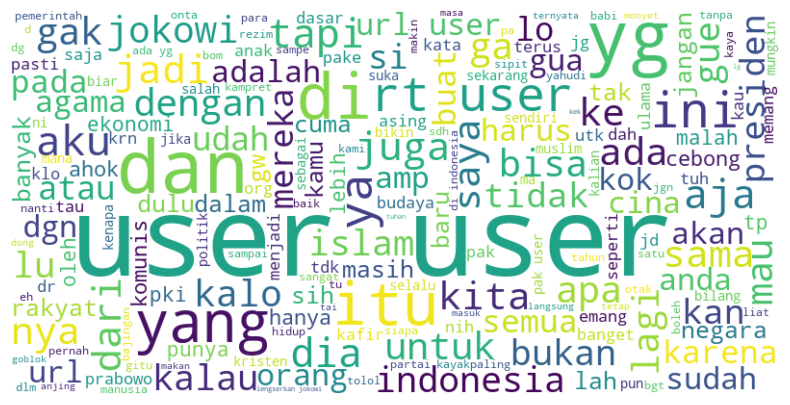

In [19]:
# Fungsi untuk membersihkan teks dari karakter yang di-encode, escape sequences, dan karakter Unicode
def clean_text(text):
    # Menghapus karakter yang di-encode dengan format \xHH
    pattern_encoded = re.compile(r'\\x[0-9A-Fa-f]{2}')
    text = pattern_encoded.sub('', text)
    
    # Menghapus escape sequences seperti \n, \t, dll.
    pattern_escape = re.compile(r'\\n|\\t')
    text = pattern_escape.sub(' ', text)
    
    # Membersihkan karakter Unicode
    text_cleaned = text.encode('latin1', 'ignore').decode('utf-8', 'ignore')

     # Konversi teks menjadi lowercase
    text_cleaned = text_cleaned.lower()
    
    return text_cleaned

# Menerapkan fungsi clean_text pada kolom teks tertentu
df['tweet_cleaned'] = df['Tweet'].apply(clean_text)

# Menampilkan hasil
df['tweet_cleaned'].head()

# Gabungkan semua teks yang sudah dibersihkan menjadi satu string besar
all_text = ' '.join(df['tweet_cleaned'])

# Buat WordCloud dari teks tersebut
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()